**Understanding the available data**

In [1]:
# import necessary libraries
import pandas as pd
import os
from pathlib import Path
from glob import glob
import pydicom
import matplotlib.pyplot as plt

In [2]:
df_path = Path("/home/sonujha/rnd/spine-degenerative-classification")

In [3]:
# check all the given data
os.listdir(df_path/'data')

['train_images',
 'train_merged.csv',
 'train.csv',
 'coords_rsna_improved.csv',
 'coords_pretrain.csv',
 'train_series_descriptions.csv',
 'test_series_descriptions.csv',
 'train_label_coordinates.csv',
 'sample_submission.csv',
 'test_images']

In [4]:
# check the train data
df = pd.read_csv(df_path/'data/train.csv')

**Analysis of train data**

In [5]:
df.shape

(1975, 26)

In [6]:
df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [7]:
df.columns

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

**So fast as per my understanding, for each study id we have to predict the 3 severity level for all the 5 cases**

**There is a minor confusion regarding 3 output in the submission and 5 levels in the training files which I'll figure out later**

In [8]:
# hope every study id is unique
assert df['study_id'].nunique() == df.shape[0], "all study_id is not unique"

In [9]:
# lets check description data
train_desc = pd.read_csv(df_path/'data/train_series_descriptions.csv')

In [10]:
train_desc.shape

(6294, 3)

In [11]:
train_desc.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [12]:
train_desc.study_id.nunique()

1975

# train_desc.series_description.unique()

In [13]:
# Every sutdy id has more than one series_id, for now I will not understnad series description will check later

In [14]:
# what is train label co-ordinates? Is is the area where diseases is present on the image?
train_labels = pd.read_csv(df_path/'data/train_label_coordinates.csv')

In [15]:
train_labels.shape

(48692, 7)

In [16]:
train_labels.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


**There are only one co-oreinate, will check it later**

In [17]:
images = glob(str(df_path/'data/train_images/**/**/*'))
len(images)

147218

In [18]:
images[:5]

['/home/sonujha/rnd/spine-degenerative-classification/data/train_images/1142910752/93706222/18.dcm',
 '/home/sonujha/rnd/spine-degenerative-classification/data/train_images/1142910752/93706222/12.dcm',
 '/home/sonujha/rnd/spine-degenerative-classification/data/train_images/1142910752/93706222/5.dcm',
 '/home/sonujha/rnd/spine-degenerative-classification/data/train_images/1142910752/93706222/19.dcm',
 '/home/sonujha/rnd/spine-degenerative-classification/data/train_images/1142910752/93706222/11.dcm']

**lets view some images**

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 3764335465.1.58
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 3764335465.1.58
(0008, 0023) Content Date                        DA: '20240503'
(0008, 0033) Content Time                        TM: '224024.284080'
(0008, 103e) Series Description                  LO: 'T2'
(0010, 0020) Patient ID                          LO: '3764335465'
(0018, 0050) Slice Thickness                     DS: '3.5'
(0018, 0088) Spacing Between Slices              DS: '3.5'
(0018, 5100) Patient Position        

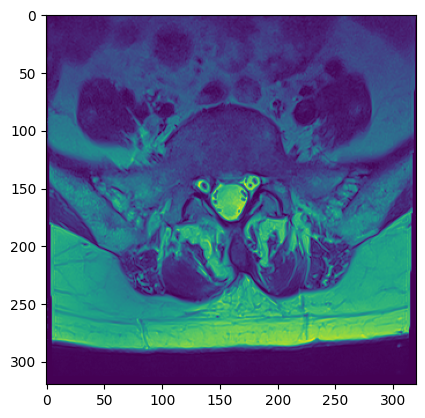

In [19]:
import random
img_path = random.choice(images)
dcm_img = pydicom.dcmread(img_path, force=True)
print(dcm_img)

img = dcm_img.pixel_array
plt.imshow(img)

## lets check some issue with image

In [90]:
df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [222]:
def get_img_from_study_id(study_id: int, series_id: int, instance_number: int):
    dicom_file_path = os.path.join(str(df_path/'data/train_images'), str(study_id), str(series_id), f"{str(instance_number)}.dcm")
    return dicom_file_path

In [636]:
def show_random_images_with_study_id(s_id):
    
    info = train_labels.loc[train_labels['study_id']==s_id]
    idx = random.randint(0, len(info))
    study_id =  info.iloc[idx]['study_id']
    series_id = info.iloc[idx]['series_id']
    instance_no = info.iloc[idx]['instance_number']
    condition = info.iloc[idx]['condition']
    level = info.iloc[idx]['level']
        
    print(f"Study ID: {study_id}, Series ID: {series_id}, Instance: {instance_no}")
    print(f"condition: {condition}, level {level}")
    
    # Load the DICOM file
    dicom_file_path = get_img_from_study_id(study_id, series_id, instance_no)
    dicom_image = pydicom.dcmread(dicom_file_path)
    
    # Display the image with labels
    # plt.figure(figsize=(10, 10))
    #plt.imshow(dicom_image.pixel_array, cmap=plt.cm.bone)
    plt.imshow(dicom_image.pixel_array)
    plt.axis('off')
    plt.show()
    return info

Study ID: 3457755755, Series ID: 776752953, Instance: 11
condition: Right Neural Foraminal Narrowing, level L4/L5


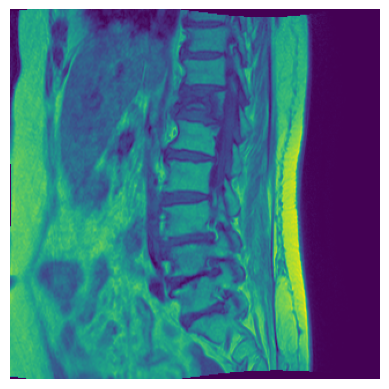

In [654]:
study_id = random.choice(train_labels['study_id'])
info = show_random_images_with_study_id(study_id)

Study ID: 3438741348, Series ID: 1351643327, Instance: 13
condition: Right Subarticular Stenosis, level L3/L4


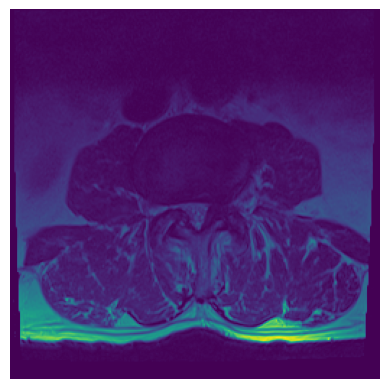

In [655]:
study_id = random.choice(train_labels['study_id'])
info = show_random_images_with_study_id(study_id)

Study ID: 2490271413, Series ID: 1404949361, Instance: 3
condition: Left Neural Foraminal Narrowing, level L5/S1


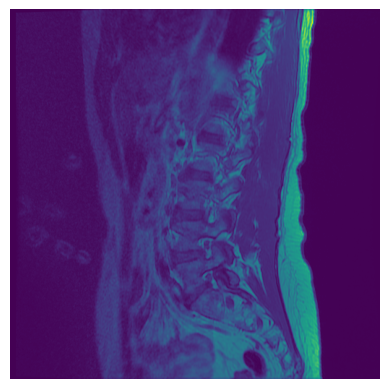

In [656]:
study_id = random.choice(train_labels['study_id'])
info = show_random_images_with_study_id(study_id)

Study ID: 1637355643, Series ID: 2564916916, Instance: 6
condition: Right Neural Foraminal Narrowing, level L1/L2


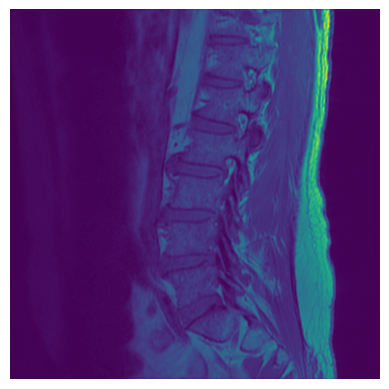

In [657]:
study_id = random.choice(train_labels['study_id'])
info = show_random_images_with_study_id(study_id)